In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            'PlantVillage',
            shuffle = True,
            image_size = IMAGE_SIZE,
            batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)      #number of batches

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 2 0 0 1 0 2 0 0 0 1 0]


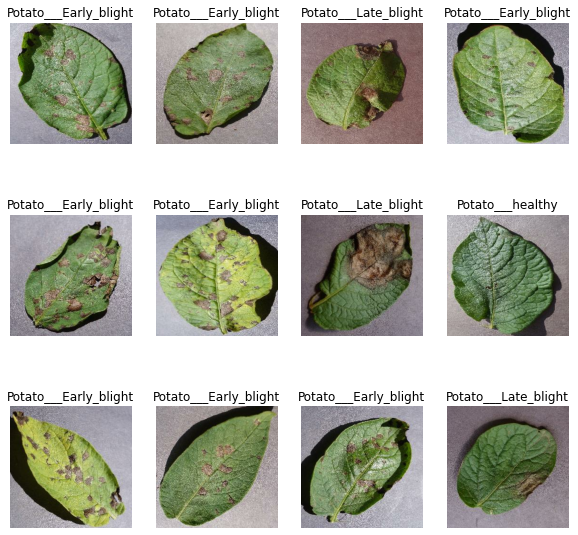

In [10]:
plt.figure(figsize = (10, 10))

#taking the first batch
for image_batch, label_batch in dataset.take(1):
    
    #plotting 12 images from 1st batch
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [5]:
#define train, val, test batches

def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [6]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [8]:
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
#resining & rescaling the images
resize_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
#augument the images
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape = input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [14]:
history = model.fit(train_ds,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         verbose = 1,
          validation_data = val_ds
         )

Epoch 1/10
54/54 [==============================] - 258s 4s/step - loss: 0.8823 - accuracy: 0.4983 - val_loss: 0.7645 - val_accuracy: 0.7448
Epoch 2/10
54/54 [==============================] - 207s 4s/step - loss: 0.6139 - accuracy: 0.7309 - val_loss: 0.4953 - val_accuracy: 0.7865
Epoch 3/10
54/54 [==============================] - 206s 4s/step - loss: 0.3657 - accuracy: 0.8484 - val_loss: 0.2271 - val_accuracy: 0.9427
Epoch 4/10
54/54 [==============================] - 217s 4s/step - loss: 0.2703 - accuracy: 0.8906 - val_loss: 0.2726 - val_accuracy: 0.8906
Epoch 5/10
54/54 [==============================] - 205s 4s/step - loss: 0.2835 - accuracy: 0.8929 - val_loss: 0.1750 - val_accuracy: 0.9271
Epoch 6/10
54/54 [==============================] - 201s 4s/step - loss: 0.2077 - accuracy: 0.9201 - val_loss: 0.1977 - val_accuracy: 0.9219
Epoch 7/10
54/54 [==============================] - 198s 4s/step - loss: 0.1878 - accuracy: 0.9294 - val_loss: 0.3411 - val_accuracy: 0.8490
Epoch 8/10
54

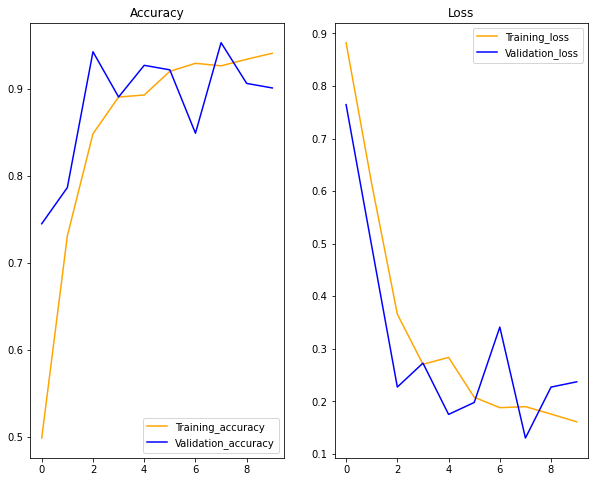

In [15]:
plt.figure(figsize = (10, 8))

plt.subplot(1,2,1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(EPOCHS)
plt.plot(epochs, train_acc, color = 'orange', label = 'Training_accuracy')
plt.plot(epochs, val_acc, color = 'blue', label = 'Validation_accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1,2,2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(EPOCHS)
plt.plot(epochs, train_loss, color = 'orange', label = 'Training_loss')
plt.plot(epochs, val_loss, color = 'blue', label = 'Validation_loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

1/1 [==============================] - 0s 31ms/step
Actual_label:  Potato___Early_blight
Pred_label:  Potato___Early_blight
Confidence: 99.97% 


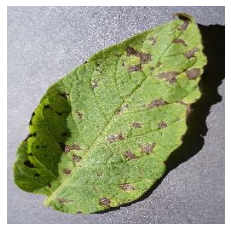

In [48]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype ('uint8')
    first_label = class_names[labels_batch[0]]
    
    img_array = tf.expand_dims(first_image, 0)
    pred = model.predict(img_array)[0]
    pred_index = np.argmax(pred)
    pred_label = class_names[pred_index]
    confidence = round(100*np.max(pred), 2)

    
    plt.imshow(first_image)
    plt.axis('off')
    print('Actual_label: ', first_label)
    print('Pred_label: ', pred_label)
    print(f'Confidence: {confidence}% ')
    
    
    

1/1 [==============================] - 0s 94ms/step


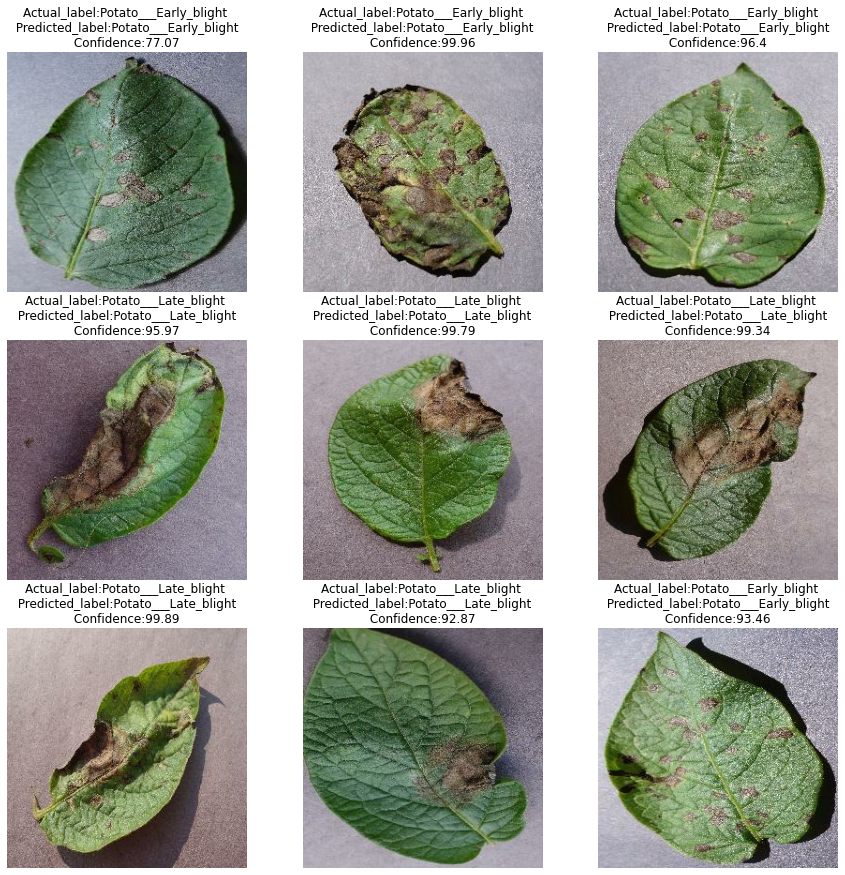

In [17]:
#predict the 9 images from 1st test batch
plt.figure(figsize = (15, 15))

for images_batch, labels_batch in test_ds.take(1):
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        image = images_batch[i].numpy().astype ('uint8')
        label = class_names[labels_batch[i]]
    
        img_array = tf.expand_dims(image, 0)
        pred = model.predict(img_array)[0]
        pred_index = np.argmax(pred)
        pred_label = class_names[pred_index]
        confidence = round(100*np.max(pred), 2)

    
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual_label:{label} \n Predicted_label:{pred_label} \n Confidence:{confidence} ")


In [18]:
model.save('potatoes_disease_detection.h5')